# clustering colors from image with K-means


In [3]:

import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle

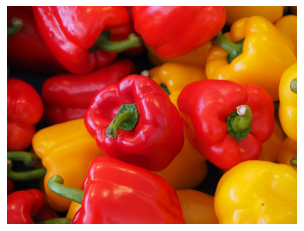

In [5]:
img= plt.imread('peppers.jpg')
plt.imshow(img)
plt.axis('off');


In [6]:
img.shape

(480, 640, 3)

In [7]:
img_flat= img.reshape(img.shape[0]*img.shape[1],3)
img_flat[:5,:]

array([[15, 18, 25],
       [26, 16, 24],
       [42, 15, 22],
       [65, 16, 22],
       [85, 14, 22]], dtype=uint8)

In [8]:
img_flat.shape

(307200, 3)

lets run kmean with 8 cluster:

In [17]:
kmeans= KMeans(n_clusters=3,random_state=0).fit(img_flat)

In [18]:
img_flat2=img_flat.copy()

for i in np.unique(kmeans.labels_):
    img_flat2[kmeans.labels_==i,:]=kmeans.cluster_centers_[i]

In [19]:
img_flat2

array([[ 75,  26,   8],
       [ 75,  26,   8],
       [ 75,  26,   8],
       ...,
       [227, 156,  31],
       [227, 156,  31],
       [227, 156,  31]], dtype=uint8)

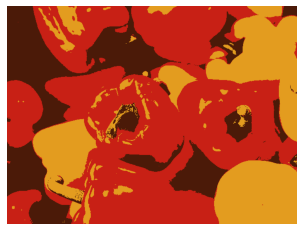

In [20]:
img2=img_flat2.reshape(img.shape)
plt.imshow(img2)
plt.axis("off");

making a loop to see how image looks with different colors

In [52]:
def image_cluster(img, k):
    img_flat = img.reshape(img.shape[0]*img.shape[1],3)
    kmeans = KMeans(n_clusters=k, random_state=0).fit(img_flat)
    img_flat2 = img_flat.copy()

    # loops for each cluster center
    for i in np.unique(kmeans.labels_):
        img_flat2[kmeans.labels_==i,:] = kmeans.cluster_centers_[i]
        
    img2 = img_flat2.reshape(img.shape)
    return img2, kmeans.inertia_

In [53]:
k_vals = list(range(2,21,2))
img_list = []
inertia = []
for k in k_vals:
#    print(k)
    img2, ine = image_cluster(img,k)
    img_list.append(img2)
    inertia.append(ine)  

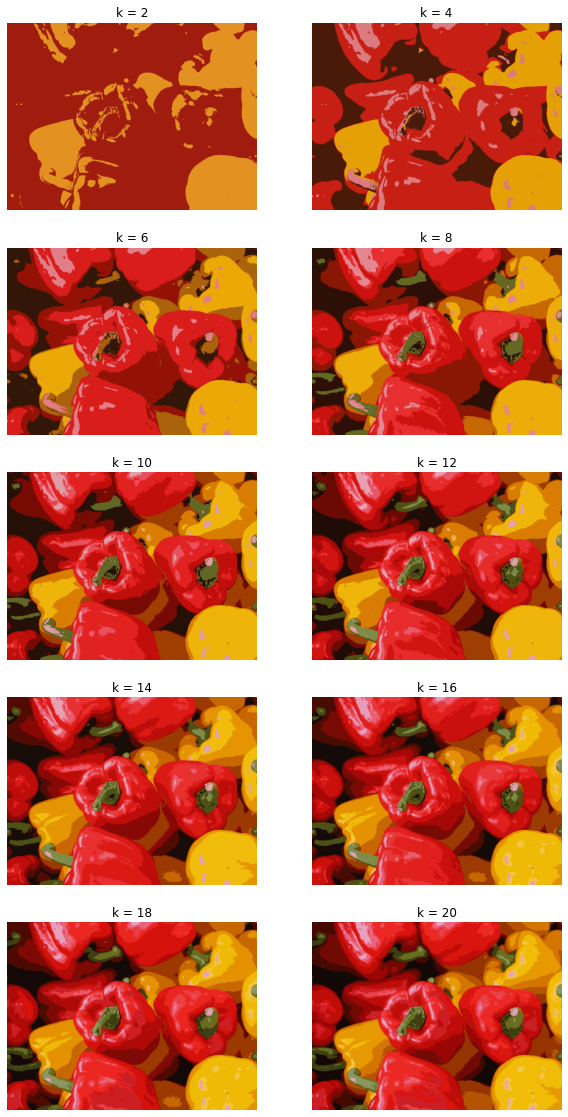

In [54]:
plt.figure(figsize=[10,20])
for i in range(len(k_vals)):
    plt.subplot(5,2,i+1)
    plt.imshow(img_list[i])
    plt.title('k = '+ str(k_vals[i]))
    plt.axis('off');